# S Vinod Kumar

Task 2 - Clustering.

In [1]:
# IMPORTING REQUIRED LIBRARIES.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
#pd.set_option('display.max_rows', 10)

In [2]:
# IMPORT DATASET.

DATA = pd.read_csv("Iris.csv").drop("Id",axis=1)
DATA

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# CHECK FOR NULL VALUES

DATA.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

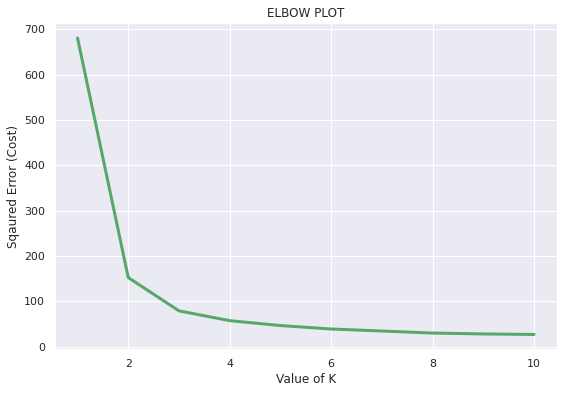

In [4]:
# ELBOW METHOD FOR COMPUTING OPTIMUM NUMBER OF CLUSTERS

from sklearn.cluster import KMeans

cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(DATA.drop("Species",axis=1)) 

    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.figure(figsize=(9,6))
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.title("ELBOW PLOT")
plt.show() 

In [5]:
# COMPUTING K-MEANS FOR THE GIVEN DATA

clustering_kmeans = KMeans(n_clusters=3, precompute_distances="auto", n_jobs=-1)
DATA['clusters'] = clustering_kmeans.fit_predict(DATA.drop("Species",axis=1))
DATA

/home/vk/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/home/vk/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusters
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


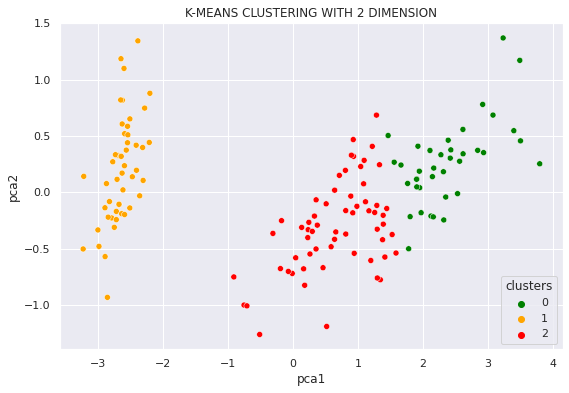

In [6]:
# DIMENSIONALITY REDUCTION (PCA)
from sklearn.decomposition import PCA

REDUCED_DATA = PCA(n_components=2).fit_transform(DATA.drop(["Species","clusters"],axis=1))
FINAL = pd.DataFrame(REDUCED_DATA,columns=['pca1','pca2'])

# PLOTTING OF CLUSTERS

plt.figure(figsize=(9,6))
sns.scatterplot(x="pca1", y="pca2", hue=DATA['clusters'],palette=['green','orange','red'] ,data=FINAL)
plt.title('K-MEANS CLUSTERING WITH 2 DIMENSION')
plt.show()